In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('lifeExpectancy.csv', usecols = [3, 4, 10, 12, 14])

In [19]:
from sklearn.model_selection import train_test_split as split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer as imputer

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Life expectancy   2928 non-null   float64
 1   Adult Mortality   2928 non-null   float64
 2    BMI              2904 non-null   float64
 3   Polio             2919 non-null   float64
 4   Diphtheria        2919 non-null   float64
dtypes: float64(5)
memory usage: 114.9 KB


In [21]:
df.columns = ['life', "mortality", 'bmi', 'polio', 'diptheria']

# Fixing strategy

In [22]:
mean_fillna = imputer(strategy = 'mean')
median_fillna = imputer(strategy = 'median')

In [23]:
train_x, test_x, train_y, test_y = split(df.iloc[:, 1:], df.iloc[:, 0], test_size = 0.2)

In [24]:
transformer = ColumnTransformer(transformers = [
  ('tnf1', mean_fillna, ['mortality']),
  ('tnf2', median_fillna, ['polio'])
], remainder = 'passthrough')

In [25]:
new_train_x = transformer.fit_transform(train_x)
new_test_x = transformer.transform(test_x)

In [26]:
transformed_train_x = pd.DataFrame(new_train_x, columns = train_x.columns)
transformed_test_x = pd.DataFrame(new_test_x, columns = train_x.columns)

In [27]:
transformed_train_x

,mortality,bmi,polio,diptheria
0,66.0,98.0,25.9,98.0
1,153.0,91.0,67.8,9.0
2,128.0,97.0,53.6,96.0
3,116.0,95.0,55.0,95.0
4,195.0,95.0,55.2,94.0
...,...,...,...,...
2345,149.0,98.0,26.0,98.0
2346,18.0,92.0,58.9,92.0
2347,391.0,55.0,12.3,3.0
2348,9.0,95.0,58.7,96.0


# Testing variation
## if variation is too much then the algorithm is not very useful

In [34]:
print(train_x['mortality'].var()-transformed_train_x['mortality'].var())
print(train_x['bmi'].var()-transformed_train_x['bmi'].var())
print(train_x['polio'].var()-transformed_train_x['polio'].var())
print(train_x['diptheria'].var()-transformed_train_x['diptheria'].var())

59.600500491576895
-156.05587142247578
158.32995639178125
0.0


<Axes: ylabel='Density'>

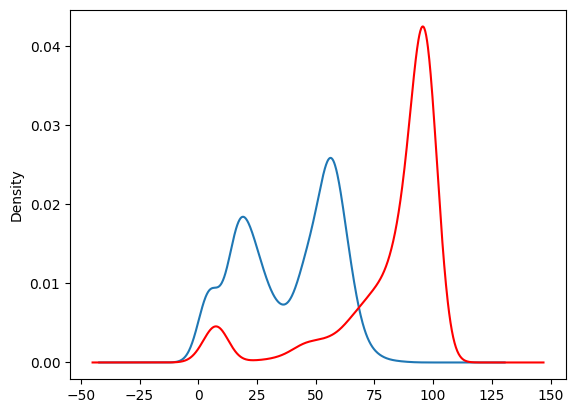

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

train_x['bmi'].plot(kind = 'kde', ax = ax)
transformed_train_x['bmi'].plot(kind = 'kde', ax = ax, color = 'red')

<Axes: ylabel='Density'>

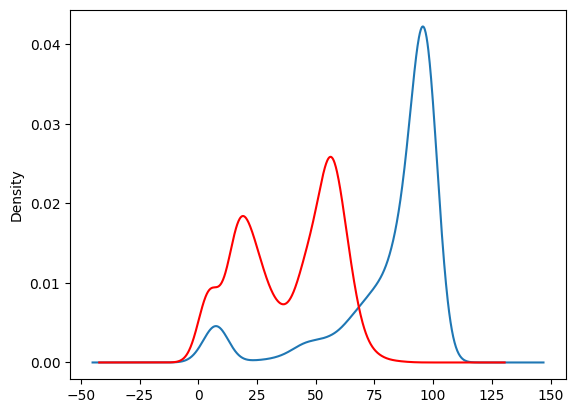

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

train_x['polio'].plot(kind = 'kde', ax = ax)
transformed_train_x['polio'].plot(kind = 'kde', ax = ax, color = 'red')

<Axes: >

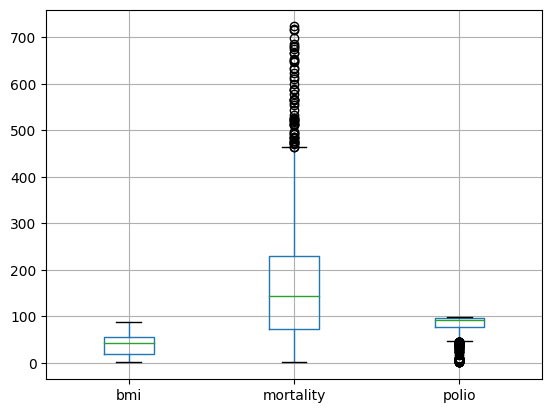

In [40]:
train_x[['bmi', 'mortality', 'polio']].boxplot()

<Axes: >

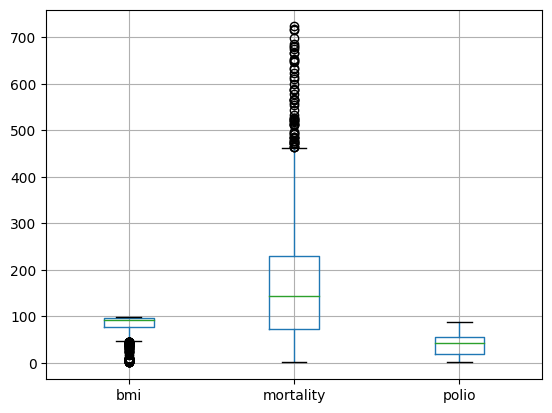

In [41]:
transformed_train_x[['bmi', 'mortality', 'polio']].boxplot()